<a href="https://colab.research.google.com/github/2Randi/AIRBNB/blob/main/TP1_HAI817I_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1>TP 1 - Analyse d'un jeu de données</H1>

Nous allons dans ce TP analyser le jeu de données Titanic qui est très largement utilisé dans la communauté. Il concerne les informations concernant les personnes qui étaient à bord du Titanic.  
Les différentes colonnes sont les suivantes :  
    survival: Survival (0 = No; 1 = Yes)  
    pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)  
    name: Name  
    sex: Sex  
    age: Age  
    sibsp: Number of Siblings/Spouses Aboard  
    parch: Number of Parents/Children Aboard  
    ticket: Ticket Number  
    fare: Passenger Fare  
    cabin: Cabin  
    embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)  

## **Installation**



Avant de commencer, il est nécessaire de déjà posséder dans son environnement toutes les librairies utiles. Dans la seconde cellule nous importons toutes les librairies qui seront utiles à ce notebook. Il se peut que, lorsque vous lanciez l'éxecution de cette cellule, une soit absente. Dans ce cas il est nécessaire de l'installer. Pour cela dans la cellule suivante utiliser la commande :  

*! pip install nom_librairie*  

**Attention :** il est fortement conseillé lorsque l'une des librairies doit être installer de relancer le kernel de votre notebook.

**Remarque :** même si toutes les librairies sont importées dès le début, les librairies utiles pour des fonctions présentées au cours de ce notebook sont ré-importées de manière à indiquer d'où elles viennent et ainsi faciliter la réutilisation de la fonction dans un autre projet.

In [ ]:
# utiliser cette cellule pour installer les librairies manquantes
# pour cela il suffit de taper dans cette cellule : !pip install nom_librairie_manquante
# d'exécuter la cellule et de relancer la cellule suivante pour voir si tout se passe bien
# recommencer tant que toutes les librairies ne sont pas installées ...


#!pip install ..

# ne pas oublier de relancer le kernel du notebook

In [32]:
# Importation des différentes librairies utiles pour le notebook

#Sickit learn met régulièrement à jour des versions et
#indique des futurs warnings.
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
import random

Pour pouvoir lire et sauvegarder sur votre répertoire Google Drive, il est nécessaire de fournir une autorisation. Pour cela il suffit d'éxecuter la ligne suivante et de saisir le code donné par Google.

In [14]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


Corriger éventuellement la ligne ci-dessous pour mettre le chemin vers un répertoire spécifique dans votre répertoire google drive :

In [23]:
my_local_drive='/content/gdrive/My Drive/TP1ML'
# Ajout du path pour les librairies, fonctions et données
sys.path.append(my_local_drive)
# Se positionner sur le répertoire associé
%cd $my_local_drive

%pwd

/content/gdrive/My Drive/TP1ML


'/content/gdrive/My Drive/TP1ML'

## **Travaux pratiques**

**Lecture du fichier**  
Récupérer le fichier titanic.csv et le mettre dans le répertoire Dataset.  
Intégrer le contenu de ce fichier dans un dataframe pandas.

In [26]:
import pandas as pd

#attention le séparateur est une tabulation
df=pd.read_csv('titanic.csv', sep='\t')
display(df.head())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Analyse des données

L'objectif dans un premier temps est de se familiariser avec pandas pour obtenir des informations sur le jeu de données.  

**Pandas**  

Afficher la taille du dataframe, les six premières lignes, les trois dernières lignes et 5 lignes au hasard du dataframe.

In [33]:
print('taille du dataframe: ')
df.shape
print('Six premières lignes du dataframe :')
df.iloc[0:7,:]
print(' Trois dernières lignes du dataframe :')
df.iloc[-3:, :]
print('Cinq lignes au hasard du dataframe : ')
df.iloc[random.sample(range(1, 101), 5), :]

taille du dataframe: 
Six premières lignes du dataframe :
 Trois dernières lignes du dataframe :
Cinq lignes au hasard du dataframe : 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S
92,93,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.1750,E31,S
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C


Donner les informations sur le cinquième passager

In [34]:
print('Donner les informations sur le cinquième passager')
df.iloc[4, :]






Donner les informations sur le cinquième passager


PassengerId                           5
Survived                              0
Pclass                                3
Name           Allen, Mr. William Henry
Sex                                male
Age                                35.0
SibSp                                 0
Parch                                 0
Ticket                           373450
Fare                               8.05
Cabin                               NaN
Embarked                              S
Name: 4, dtype: object

Donner toutes les informations sur les passagers compris entre les lignes 10 et 16

In [35]:
print('Donner toutes les informations sur les passagers compris entre les lignes 10 et 16')
df.iloc[10:17, :]




Donner toutes les informations sur les passagers compris entre les lignes 10 et 16


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q


Donner les informations sur le passager dont le numéro (PassengerId) est 5

In [36]:

print('Donner les informations sur le passager dont le numéro (PassengerId) est 5')
df[df['PassengerId']==5]



Donner les informations sur le passager dont le numéro (PassengerId) est 5


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


Indiquer les différentes informations associées aux colonnes (Nom des colonnes, type de la colonne, place prise par le dataframe, etc).

In [37]:
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Name         156 non-null    object 
 4   Sex          156 non-null    object 
 5   Age          126 non-null    float64
 6   SibSp        156 non-null    int64  
 7   Parch        156 non-null    int64  
 8   Ticket       156 non-null    object 
 9   Fare         156 non-null    float64
 10  Cabin        31 non-null     object 
 11  Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 14.8+ KB


Quel est le type de la colonne *Name* ?

In [38]:

print('type de la colonne Name')
df['Name'].dtypes



type de la colonne Name


dtype('O')

Donner des statistiques de base du dataframe et préciser pourquoi Name n'apparait pas dans le résultat.

In [39]:

df.describe()



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,156.000000,156.000000,156.000000,126.000000,156.000000,156.000000,156.000000
mean,78.500000,0.346154,2.423077,28.141508,0.615385,0.397436,28.109587
std,45.177428,0.477275,0.795459,14.613880,1.056235,0.870146,39.401047
min,1.000000,0.000000,1.000000,0.830000,0.000000,0.000000,6.750000
25%,39.750000,0.000000,2.000000,19.000000,0.000000,0.000000,8.003150
50%,78.500000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,117.250000,1.000000,3.000000,35.000000,1.000000,0.000000,30.371850
max,156.000000,1.000000,3.000000,71.000000,5.000000,5.000000,263.000000


Donner le nombre de survivants? Indication il faut compter combien de PassagerId ont survécu avec la fonction count.

In [40]:
print('nombre de survivants')
m=df[df['Survived']==1]
m['PassengerId'].count()






nombre de survivants


54

Donner par categorie male/female le nombre de personnes qui ont ou n'ont pas survécu. Indication utilisation d'un groupby.

In [41]:
print('Donner par categorie male/female le nombre de personnes qui ont ou n')
m=df.groupby(['Sex','Survived'])
m['PassengerId'].count()




Donner par categorie male/female le nombre de personnes qui ont ou n


Sex     Survived
female  0           16
        1           40
male    0           86
        1           14
Name: PassengerId, dtype: int64

Donner par categorie de classe le nombre de personnes qui ont ou n'ont pas survécu.

In [43]:
m=df.groupby(['Pclass','Sex','Survived'])
m['PassengerId'].count()




Pclass  Sex     Survived
1       female  1            9
        male    0           18
                1            3
2       female  0            1
                1           11
        male    0           15
                1            3
3       female  0           15
                1           20
        male    0           53
                1            8
Name: PassengerId, dtype: int64

Donner par categorie de classe et de sexe le nombre de personnes qui ont ou n'ont pas survécu.

In [42]:
m=df.groupby(['Pclass','Sex','Survived'])
m['PassengerId'].count()




Pclass  Sex     Survived
1       female  1            9
        male    0           18
                1            3
2       female  0            1
                1           11
        male    0           15
                1            3
3       female  0           15
                1           20
        male    0           53
                1            8
Name: PassengerId, dtype: int64

Donner la liste des femmes qui ont survécu et dont l'age est supérieure à 30

In [44]:
n=df[df['Sex']=='female']
m=n[df['Age']>30]
m[df['Survived']==1]





<ipython-input-44-24ca631ba1f1>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  m=n[df['Age']>30]
<ipython-input-44-24ca631ba1f1>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  m[df['Survived']==1]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.8500,NaN,S
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S
123,124,1,2,"Webber, Miss. Susan",female,32.5,0,0,27267,13.0000,E101,S


Donner l'age max, min et moyen des personnes qui ont survécu

In [45]:
surv=df[df['Survived']==1]
print('Age min :')
surv['Age'].min()

print('Age max :')
surv['Age'].max()

print('Age moy')
surv['Age'].mean()





Age min :
Age max :
Age moy


25.61780487804878

## Visualisation


L'objectif est ici de visualiser quelques informations à l'aide de seaborn pour mettre en évidence les premières analyses précédentes.  

Dans un premier temps à l'aide de seaborn et de la fonction countplot afficher le nombre de survivants et de non survivants

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt





Afficher le nombre de catégorie male/female (attribut Sex) avec countplot.

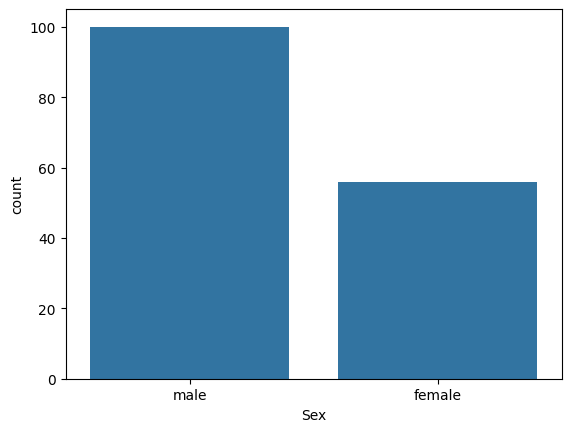

In [47]:
sns.countplot(x=df['Sex'])
plt.show()




La commande suivante affiche les survivants ou non en fonction du sexe.  

sns.factorplot(x='Survived', col='Sex', kind='count', data=df)  

Essayer de l'utiliser et faire de même par rapport aux attributs Pclass et Embarked. Que pouvez vous déduire dans un premier temps sur les survivants ou non.

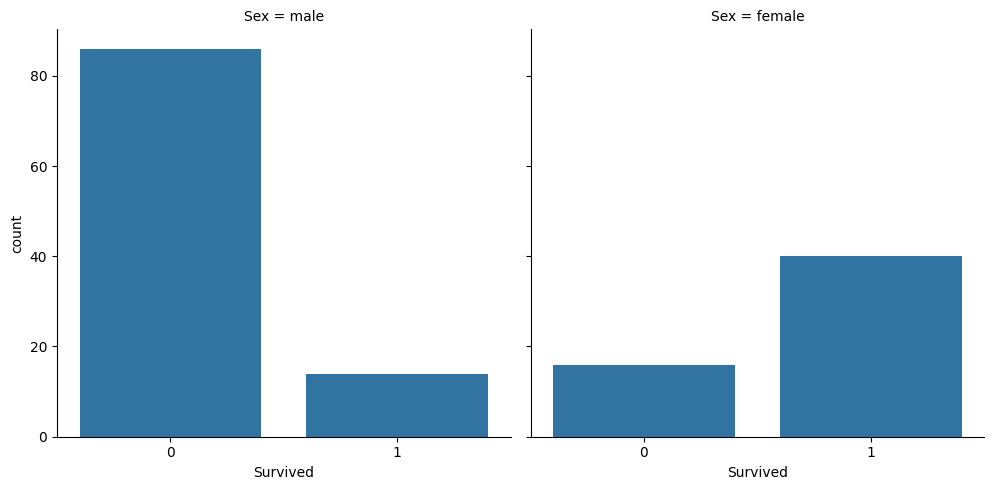

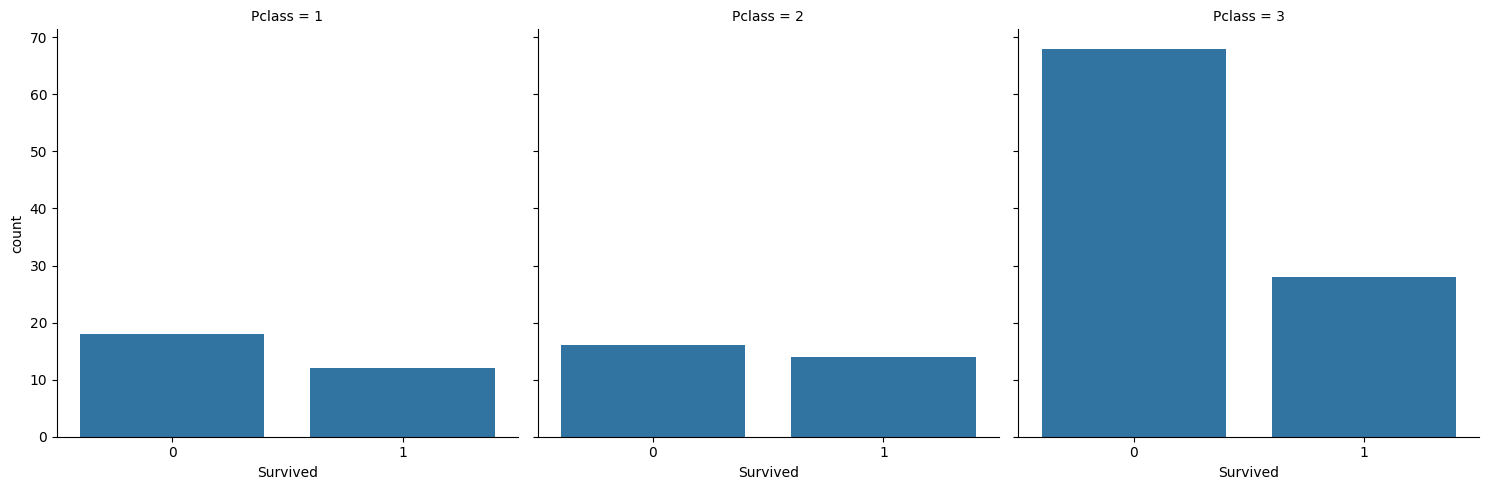

In [54]:
sns.catplot(x='Survived', col='Sex', kind='count', data=df)
sns.catplot(x='Survived', col='Pclass', kind='count', data=df)





Un peu plus loin sur l'analyse ...  

Le code suivant permet de connaître la répartition par sexe et par classe :  
g = sns.factorplot('Pclass', data=df, hue='Sex', kind='count')  
g.set_xlabels('Class')

Exécuter le code. Que constatez vous ? Faire la même chose pour Embarked

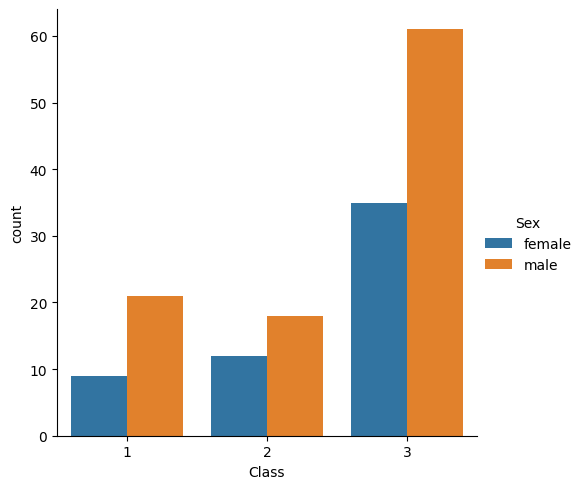

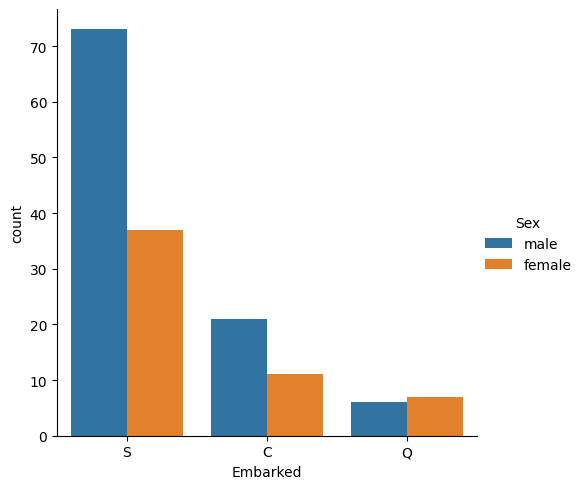

In [60]:
g = sns.catplot(x='Pclass', data=df, hue='Sex', kind='count')
g.set_xlabels('Class')

g = sns.catplot(x='Embarked', data=df, hue='Sex', kind='count')
g.set_xlabels('Class')





A votre factor plot ajouter col='Survived' comme paramètre pour voir la répartition par rapport au sexe des passagers. Faites de même par rapport à Embarked.

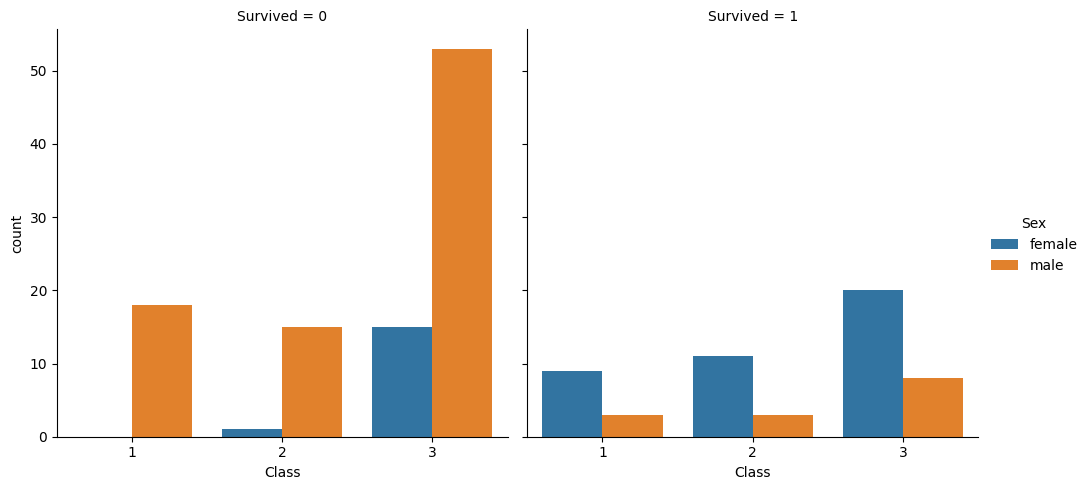

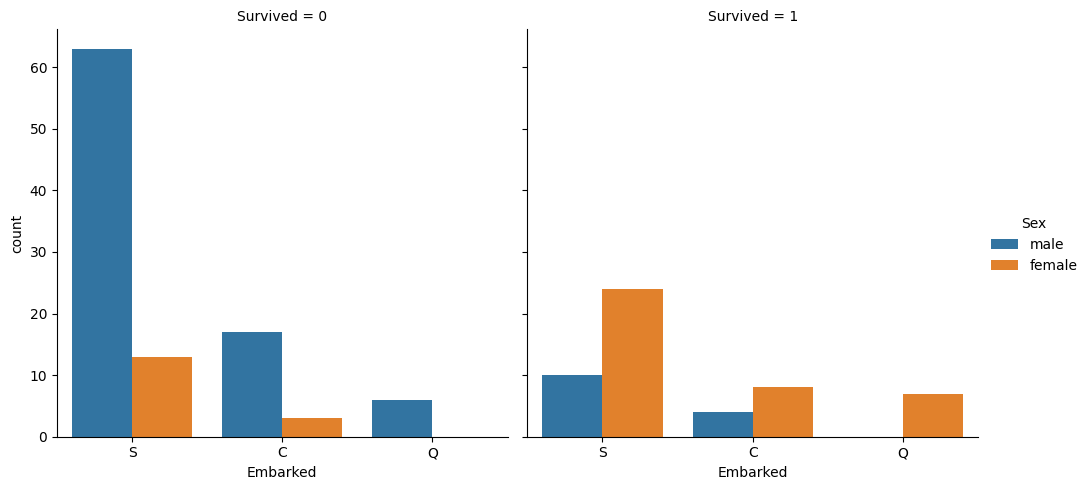

In [61]:
g = sns.catplot(x='Pclass', data=df, col='Survived', hue='Sex', kind='count')
g.set_xlabels('Class')

g = sns.catplot(x='Embarked', data=df, col='Survived', hue='Sex', kind='count')
g.set_xlabels('Class')







Créer la fonction suivante qui permet de créer des catégories en fonction de l'age des personnes.
    Ajouter dans df une colonne 'Person' qui contient la valeur de cet attribut.  
    
    def male_female_age(passenger):  
         age, sex = passenger  
         if age < 5:  
             return 'Baby'  
         if age >= 5 and age < 12:  
             return 'Child'  
         if age >= 12 and age < 18:  
             return 'Teneeger'  
         if age >=18 and age < 35:  
             return 'Young Adult'  
         if age >= 35 and age < 60:  
             return 'Adult'  
         if age >= 60:  
             return 'Senior'  
         else:  
             return sex  
    
    Rappel : pour appliquer une fonction à une colonne   
        df[['Age', 'Sex']].apply(male_female_child, axis=1)
        

In [62]:
def male_female_age(passenger):
    age, sex = passenger
    if age < 5:
        return 'Baby'
    if age >= 5 and age < 12:
        return 'Child'
    if age >= 12 and age < 18:
        return 'Teneeger'
    if age >=18 and age < 35:
        return 'Young Adult'
    if age >= 35 and age < 60:
        return 'Adult'
    if age >= 60:
        return 'Senior'
    else:
        return sex

In [84]:
df['Person']=df[['Age','Sex']].apply(male_female_age,axis=1)






Sur vos factorplot précédents remplacer hue='Sex' par hue='Person' et relancer les. Que constatez vous ?

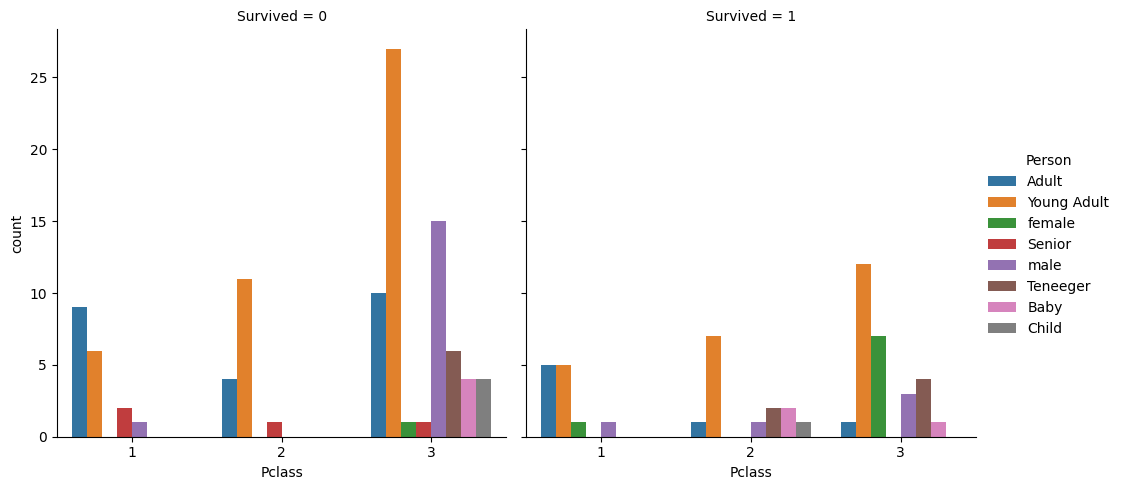

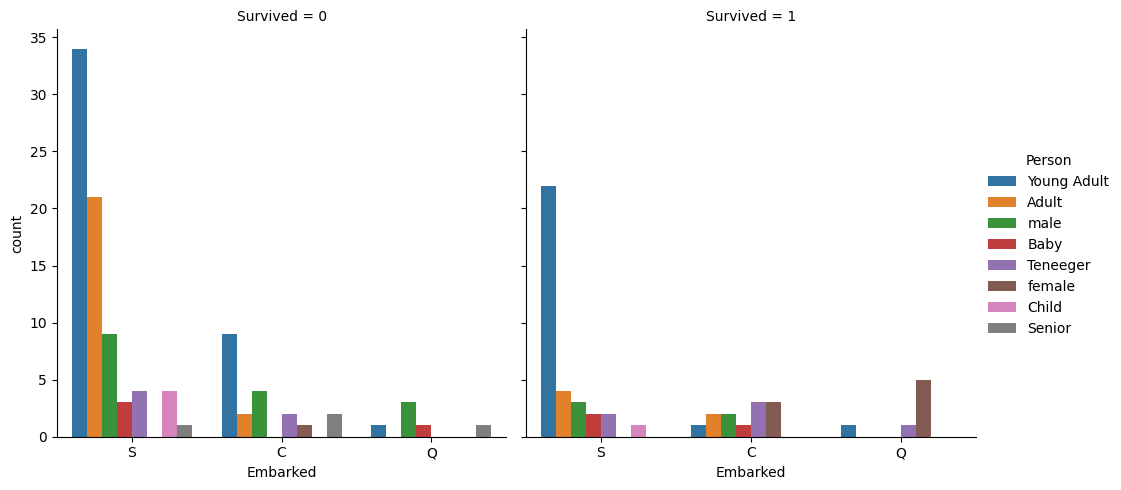

In [85]:

g = sns.catplot(x='Pclass', data=df, col='Survived', hue='Person', kind='count')
g.set_xlabels('Pclass')
g = sns.catplot(x='Embarked', data=df, col='Survived', hue='Person', kind='count')
g.set_xlabels('Embarked')






Enfin regarder la répartition pour les embarquements et les classes.

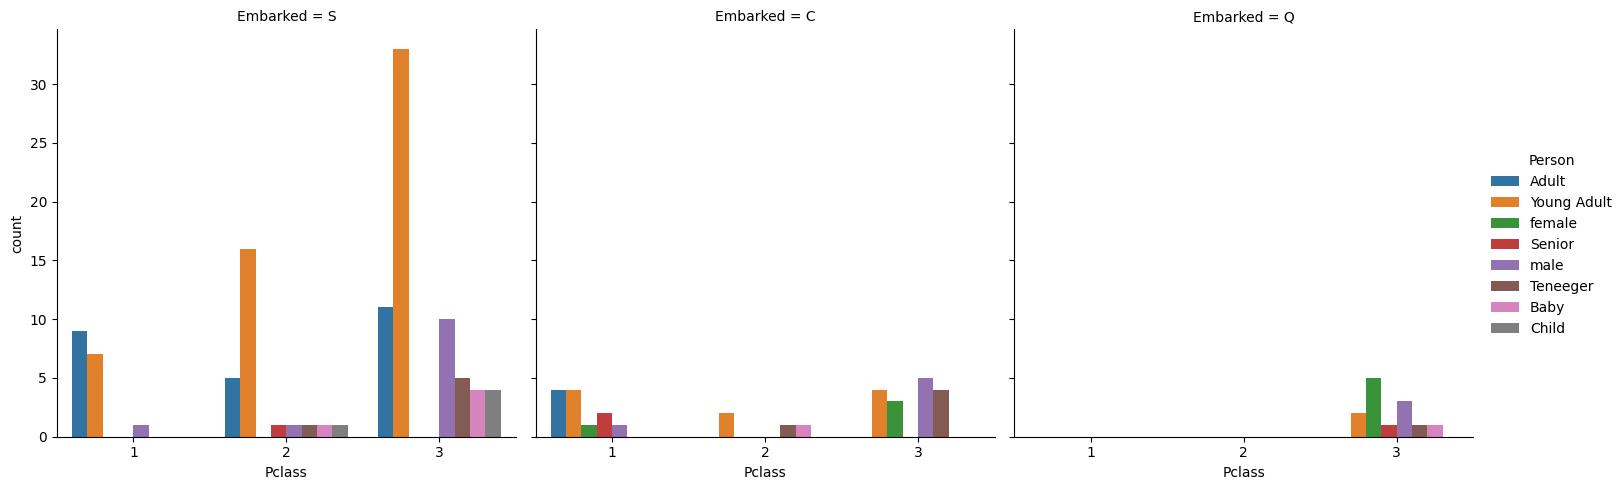

In [83]:

g = sns.catplot(x='Pclass', data=df, col='Embarked', hue='Person', kind='count')
g.set_xlabels('Pclass')





Quelques informations sur la distribution. A l'aide de displot afficher la distribution de Pclass et de Fare.

<ipython-input-91-78dce3caaefc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[['Pclass']], kde=True)


Text(0.5, 1.0, 'Distribution des classes')

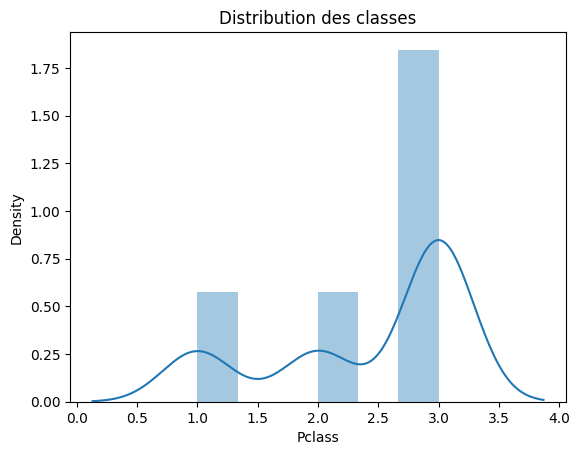

In [91]:
sns.distplot(df[['Pclass']], kde=True)
plt.xlabel('Pclass')
plt.title('Distribution des classes')






<ipython-input-93-605daa7e5657>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[['Fare']], kde=True)


Text(0.5, 1.0, 'Distribution des tarifs')

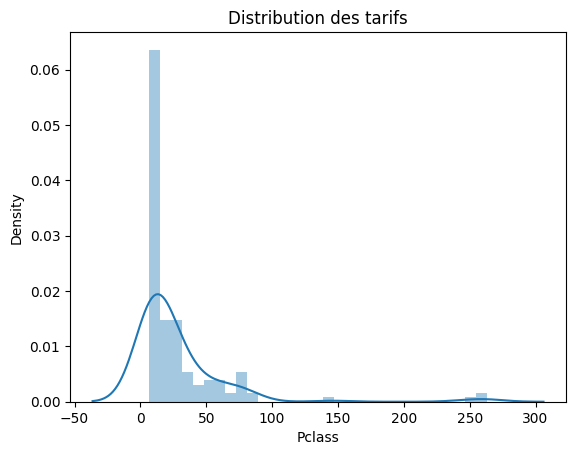

In [93]:
sns.distplot(df[['Fare']], kde=True)
plt.xlabel('Pclass')
plt.title('Distribution des tarifs')







Afficher à l'aide de la fonction boxplot une boîte à moustache pour Pclass et Fare.



<Axes: ylabel='Pclass'>

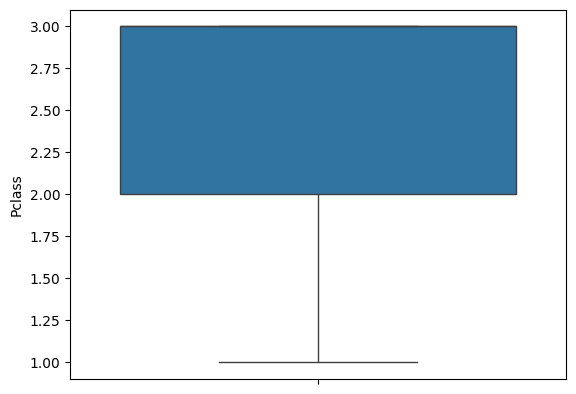

In [98]:
sns.boxplot(y='Pclass',data=df)




<Axes: ylabel='Fare'>

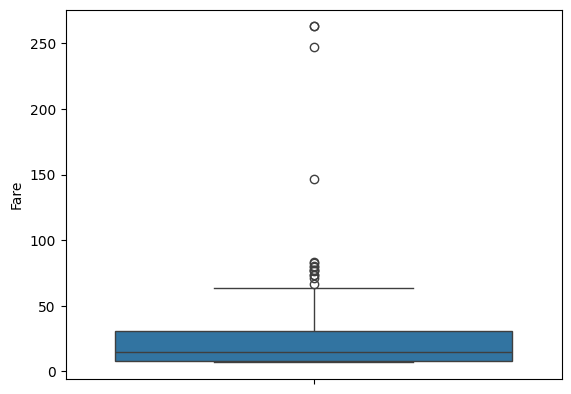

In [99]:
sns.boxplot(y='Fare',data=df)






Faire les mêmes opérations à l'aide de la fonction violinplot.  
Rappel : elle offre les mêmes fonctionnalités que les boîtes à moustache mais en plus offre des informations sur une estimation de la densité.

<Axes: ylabel='Pclass'>

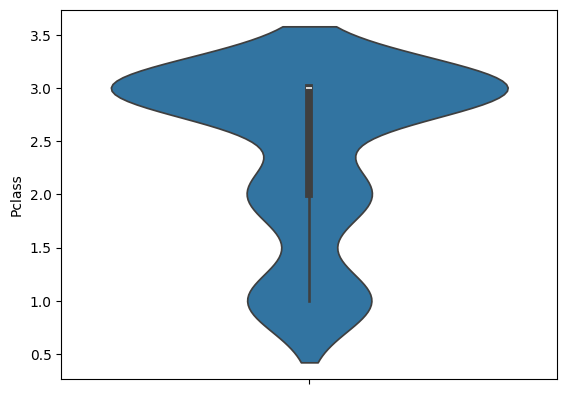

In [100]:
sns.violinplot(y='Pclass',data=df)






<ipython-input-104-4c781bbecab5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  age_dist=sns.distplot(df["Age"])


Text(0.5, 1.0, 'Distribution des ages')

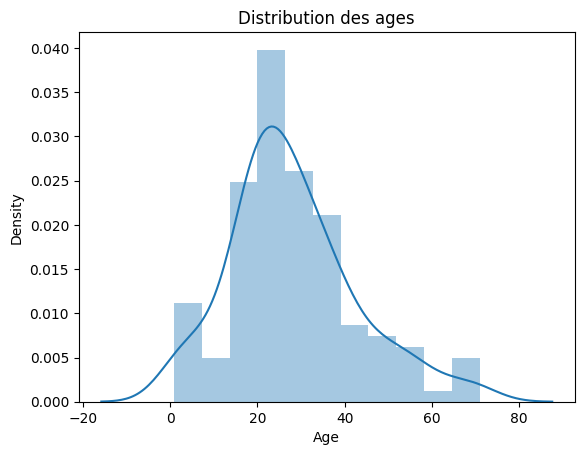

In [104]:
sns.violinplot(y='Fare',data=df)

age_dist=sns.distplot(df["Age"])
age_dist.set_title("Distribution des ages")


A présent, considérons l'age des personnes. A l'aide de displot afficher l'histogramme de distribution des ages avec le code suivant :  

age_dist=sns.distplot(df["Age"])  
age_dist.set_title("Distribution des ages")  

Que se passe-t'il ?


Une erreur est levée "cannot convert float NaN to integer". NaN indique la présence de valeurs manquantes dans le jeu de données.

## Ingénierie des données

**Traitement des valeurs manquantes**

Créer un nouveau dataframe df2 (pour créer un dataframe sans modifier le dataframe initial il faut en faire une copie : df2=df.copy()).   



In [105]:
df2=df.copy()

Donner la liste des colonnes pour lesquelles il y a des valeurs manquantes. Pour tester si une valeur est manquante, il est possible pour un dataframe d'utiliser pour une colonne la fonction isnull(). Attention celle-ci retourne un dataframe. Elle doit être suivie par any() pour avoir un booléen :  
        
        df ['colonne'].isnull().any()

In [126]:
df.isnull().any().index[df.isnull().any()]





Index(['Age', 'Cabin', 'Embarked'], dtype='object')

Il est également possible d'afficher l'ensemble des données qui contiennent des valeurs NaN de la manière suivante :
    
        
sns.heatmap(df.isnull(), cbar=False)

<Axes: >

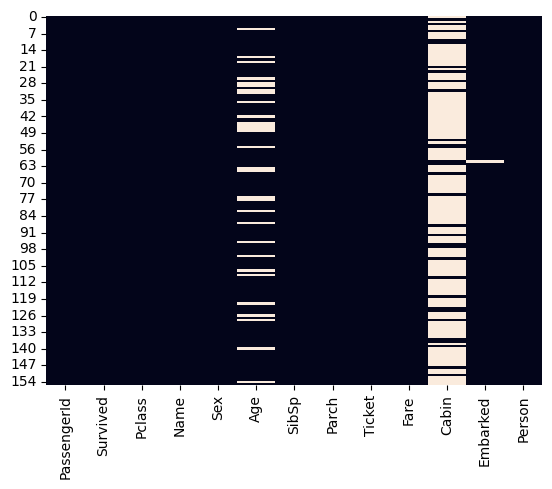

In [121]:
sns.heatmap(df2.isnull(), cbar=False)

Afficher le nombre de valeurs nulles Embarked, Cabin et Sex.


In [139]:
print('nombre de valeurs nulles Embarked, Cabin et Sex')
#df['Embarked'].isnull().value_counts()
#df['Cabin'].isnull().value_counts()
df['Sex'].isnull().value_counts()





nombre de valeurs nulles Embarked, Cabin et Sex


False    156
Name: Sex, dtype: int64

Remplacer les valeurs nulles de l'age par la moyenne des ages des passagers. Penser à vérifier que la transformation a bien été effectuée.

In [156]:
a=df['Age'].mean()


df['Age']=df['Age'].fillna(a)
#df[df['PassengerId']==6]
df.iloc[5,:]

PassengerId                   6
Survived                      0
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                   28.141508
SibSp                         0
Parch                         0
Ticket                   330877
Fare                     8.4583
Cabin                       NaN
Embarked                      Q
Person                     male
Name: 5, dtype: object

Supprimer tous les enregistrements qui contiennent encore une valeur nulle.

Utiliser sns.heatmap(df.isnull(), cbar=False) sur votre dataframe pour vérifier qu'il n'y a plus de valeurs nulles.

<Axes: >

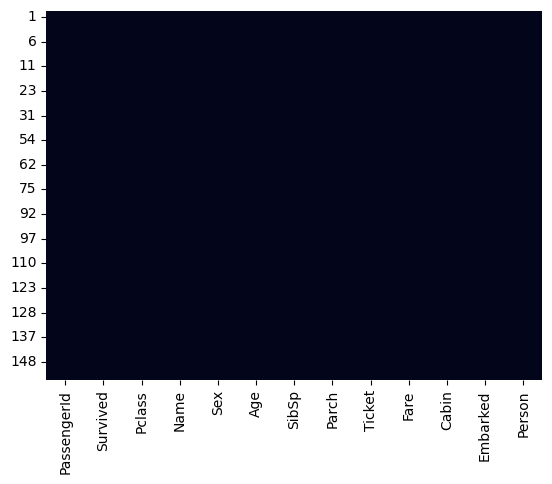

In [167]:
sns.heatmap(df.isnull(), cbar=False)






In [174]:
df=df.dropna(axis=0)

df['Embarked'].isnull().value_counts()
df['Cabin'].isnull().value_counts()






Quelle est la taille de votre dataframa à présent ? Comparer le à la taille initiale.

In [169]:
df.shape




(30, 13)

En fait en supprimant les valeurs manquantes de cabines de trop nombreux enregristrements ont été effacés. Nous pouvons constater qu'il y a beaucoup de valeurs manquantes pour Cabin et que dans tous les cas elle ne va donc pas pouvoir aider à faire de la classification.  

Créer un nouveau dataframe df3=df.copy().  
Remplacer la valeur d'age par la médiane.  
Par simplification, supprimer la colonne Cabin.  
Rappel : pour supprimer une colonne df.drop('Nom colonne',1). Effacer les autres valeurs manquantes.   
Enfin, supprimer toutes les valeurs manquantes.  

Vérifier à l'aide de heatmap que votre jeu de données n'a plus de valeurs manquantes. Indiquer la taille du jeu de données.


(155, 12)

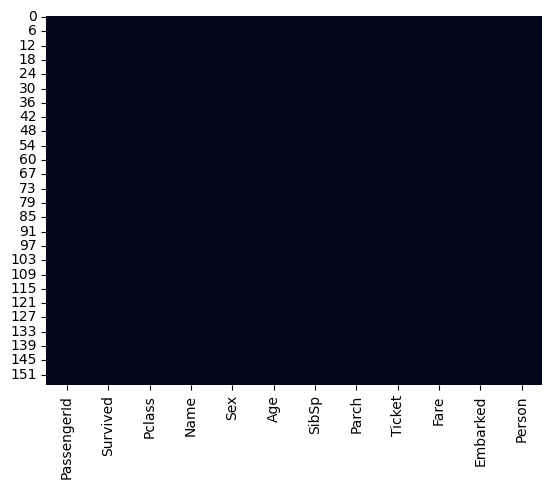

In [290]:
df3=df2.copy()
df3.shape
df3['Age']= df3['Age'].fillna(df3['Age'].mean())
df3=df3.drop(['Cabin'],axis=1)
df3=df3.dropna(axis=0)




sns.heatmap(df3.isnull(), cbar=False)


df3.shape



Afficher à présent l'histogramme des ages.

<ipython-input-291-c15a5d14f18c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  age_dist=sns.distplot(df3['Age'])


Text(0.5, 1.0, 'Distribution des ages')

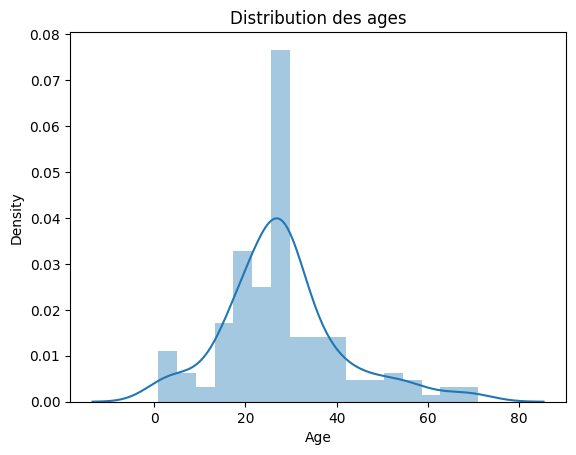

In [291]:
age_dist=sns.distplot(df3['Age'])
age_dist.set_title("Distribution des ages")






**Suppression des colonnes inutiles**

Dans cette étape il convient de supprimer les colonnes qui ne seront pas utiles pour la classification.
La question à se poser est pour chaque colonne : est ce que cela a un sens de la conserver ?   
Il faut faire des choix qui peut être auront une conséquence sur la classification !!
    
Dans le jeu de données nous voyons qu'il n'y a sans doute pas d'intérêt de conserver le numéro de ticket car il ne semble pas qu'il y ait un codage particulier.  
Le nom des passager semble inutile. Pourtant si l'on regarde un peu attentivement (df3.display()) on peut se rendre compte qu'il existe des titres différents (Mr., Master, Miss, Rev., Mrs. etc) qui pourraient avoir un impact sur la classification.  
L'identifiant du passager n'apporte pas d'information.  

Effacer les différentes colonnes : 'Ticket', 'Name' et 'PassengerId'.

    

In [292]:
df3=df3.drop(['Ticket','Name','PassengerId'], axis=1)



Un petit retour sur la colonne Person.  
A l'aide de display(df3.iloc[131] que constatez vous ?

In [293]:
display(df3.iloc[131])




Survived         0
Pclass           3
Sex         female
Age           47.0
SibSp            1
Parch            0
Fare          14.5
Embarked         S
Person       Adult
Name: 132, dtype: object

La fonction ayant été appliquée avant le traitement des valeurs manquantes toutes celles qui étaient manquantes ont été remplacées par le sexe de la personne. Supprimer la colonne Person.

In [294]:
df3=df3.drop(['Person'], axis=1)
df3



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
151,1,1,female,22.000000,1,0,66.6000,S
152,0,3,male,55.500000,0,0,8.0500,S
153,0,3,male,40.500000,0,2,14.5000,S
154,0,3,male,28.141508,0,0,7.3125,S


**Attributs continus**

Il y a deux attributs continus dans le jeu de données. Age et Fare.  

Transformer à l'aide de la fonction cut l'attribut Age de manière à ce que les valeurs puissent prendre en compte les valeurs suivantes :
   bins = (0, 5, 12, 18, 25, 35, 60, 120)  
   group_names = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']   

Transformer à l'aide de la fonction cut l'attribut Fare de manière à ce que les valeurs puissent prendre en compte les valeurs suivantes :
    bins = (0, 8, 15, 31, 1000)  
    group_names = ['1_quartile', '2_quartile', '3_quartile', '4_quartile']



In [295]:
bins = (0, 5, 12, 18, 25, 35, 60, 120)
group_names = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
df3['Age'] = pd.cut(df3['Age'], bins=bins, labels=group_names)

bins1 = (0, 8, 15, 31, 1000)
group_names1 = ['1_quartile', '2_quartile', '3_quartile', '4_quartile']
df3['Fare'] = pd.cut(df3['Fare'], bins=bins1, labels=group_names1)






**Attribut catégoriel**


Pour connaître les attributs catégoriels faire un df.info(). Les attributs catégoriels apparaissent avec comme type object ou category.

In [296]:

print (df3.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 155
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  155 non-null    int64   
 1   Pclass    155 non-null    int64   
 2   Sex       155 non-null    object  
 3   Age       155 non-null    category
 4   SibSp     155 non-null    int64   
 5   Parch     155 non-null    int64   
 6   Fare      155 non-null    category
 7   Embarked  155 non-null    object  
dtypes: category(2), int64(4), object(2)
memory usage: 9.3+ KB
None


Il y a 4 attributs catégoriels à présent dans le jeu de données. Pour chacun d'entre eux transformer les en valeur numérique à l'aide de la fonction LabelEncoder().

In [297]:
from sklearn.preprocessing import LabelEncoder

df3['Age']= LabelEncoder().fit_transform(df3['Age'])
df3['Sex']= LabelEncoder().fit_transform(df3['Sex'])
df3['Fare']= LabelEncoder().fit_transform(df3['Fare'])
df3['Embarked']= LabelEncoder().fit_transform(df3['Embarked'])

df3.iloc[random.sample(range(1, 153), 5), :]



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
8,1,3,0,6,0,2,1,2
134,0,2,1,4,0,0,1,2
42,0,3,1,6,0,0,0,0
100,0,3,0,6,0,0,0,2
41,0,2,0,6,1,0,2,2


## Sauvegarde du fichier transformé

A présent sauvegarder le fichier modifié en titanic2.csv avec comme tabulateur des ';' en conservant l'entête.

In [298]:
df3.to_csv('titanic2.csv', sep=';')







Vérifier que votre fichier a été correctement sauvegardé.

In [299]:
df4=pd.read_csv('titanic2.csv', sep=';')
df4.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,1,4,1,0,0,2
1,1,1,1,0,0,1,0,3,0
2,2,1,3,0,6,0,0,0,2
3,3,1,1,0,6,1,0,3,2
4,4,0,3,1,6,0,0,1,2
